---

Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Part 3: Regression Model for Predicting Average Price -- Using the ZHVI and Airbnb Listing Data

## a) Putting together Airbnb and Zillow features to predict Price

### Let's look at the features we have from the Airbnb Data set and Zillow Data Set. Plot them against price to determine which features, or independent variables, should be used to predict price. We are looking for a linear realtionship which may have to be achieved through transformation.

In [3]:
def read_data(location):
    location = location[['zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']].dropna(axis = 0)
    location = location.set_index('zipcode')
    return location

### ** We are going to join the Zillow data and Airbnb data according to the zip code of the listing to achieve more granularilty when looking at the real estate data for each listing. **

1) We re-read the Airbnb data and create a dataframe containing information on every listing in each city. Set the index to the zip code. 

2) We then merge the real estate data and Airbnb listing data at the zipcode and asess our features.

In [4]:
austin = read_csv('austin.csv')
austin = read_data(austin)
austin['price'] = austin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boston = read_csv('boston.csv')
boston = read_data(boston)
boston['price'] = boston['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dc = read_csv('dc.csv')
dc = read_data(dc)
dc['price'] = dc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

denver = read_csv('denver.csv')
denver = read_data(denver)
denver['price'] = denver['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

la = read_csv('la.csv')
la = read_data(la)
la['price'] = la['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nashville = read_csv('nashville.csv')
nashville = read_data(nashville)
nashville['price'] = nashville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = read_csv('nyc.csv')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

portland = read_csv('portland.csv')
portland = read_data(portland)
portland['price'] = portland['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sandiego = read_csv('sandiego.csv')
sandiego = read_data(sandiego)
sandiego['price'] = sandiego['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

seattle = read_csv('seattle.csv')
seattle = read_data(seattle)
seattle['price'] = seattle['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sf = read_csv('sf.csv')
sf = read_data(sf)
sf['price'] = sf['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

In [57]:
#DataFrame with all listings and Airbnb features:
df_abnb = concat([austin, boston, dc, denver, la, nashville, nyc, portland, sandiego, seattle, sf])

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

### Merge the two feature sets together on zipcode, we now have one dataframe will all the Airbnb and Zillow features/independent variables for predicting price:

In [7]:
df1.head()

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,Zhvi,5Year,10Year,reviewtotal
22204.0,2.0,0.0,1.0,24.0,1,339,3,87.0,9.0,9.0,476100,0.036329,0.005587,105.0
33558.0,2.0,1.0,0.0,66.0,2,364,1,100.0,8.0,8.0,336000,0.070773,-0.007617,116.0
78701.0,4.0,1.0,1.0,150.0,3,365,8,90.0,8.0,9.0,432500,0.074260,0.045489,107.0
78701.0,2.0,1.0,1.0,600.0,1,263,1,100.0,10.0,8.0,432500,0.074260,0.045489,118.0
78701.0,3.0,1.0,1.0,175.0,3,127,4,95.0,10.0,10.0,432500,0.074260,0.045489,115.0


## b) Price and Features: Finding Optimal Predictors

### Let's plot the independent variables versus price to determine which features have the strongest linear realtionship with price and which we may have to transform to achieve linearity with price.

### Price and Availability, Price and # of Reviews

We transform Availability and # of Reviews using logs to achieve a linear trend with price.

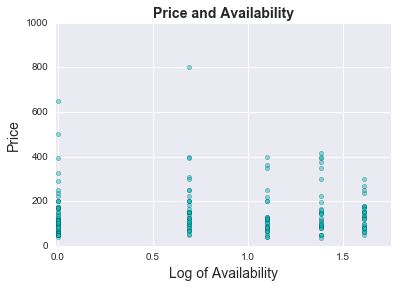

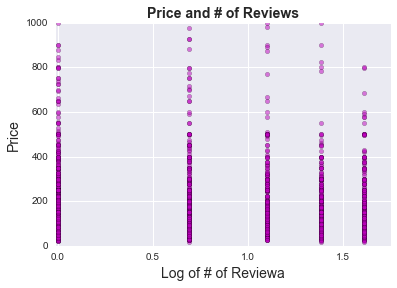

In [62]:
x = np.log(df1['availability_365'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim(0,1000)
plt.xlim(-.01,1.75)

plt.xlabel('Log of Availability', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Availability', fontsize=14, fontweight='bold')

x1 = np.log(df1['number_of_reviews'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'm', alpha = .5)
plt.ylim(0,1000)
plt.xlim(-.01,1.75)

plt.xlabel('Log of # of Reviewa', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and # of Reviews', fontsize=14, fontweight='bold')


### Price and ZHVI (Median Home Value)

#### Price and ZHVI (Median Home Value) & Price and 5, 10 Year change in ZHVI

(0.045, 0.15)

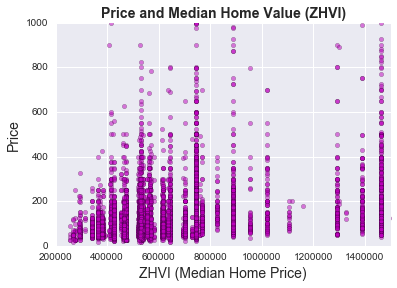

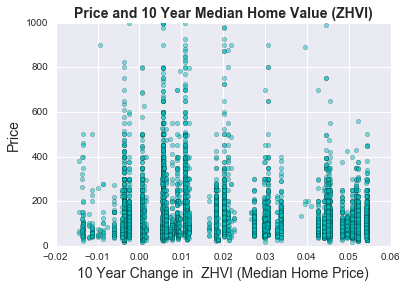

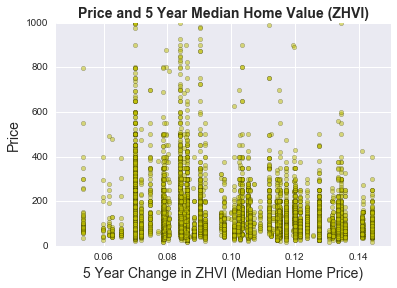

In [66]:
x2 = (df1['Zhvi'])
y2 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x2, y2, c= 'm', alpha = .5)
plt.ylim (0,1000)
plt.xlim (200000,1500000)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x = (df1['10Year'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.02,.06)

plt.xlabel('10 Year Change in  ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 10 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x1 = (df1['5Year'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'y', alpha = .5)

plt.xlabel('5 Year Change in ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 5 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')
plt.ylim (0,1000)
plt.xlim(.045,.15)


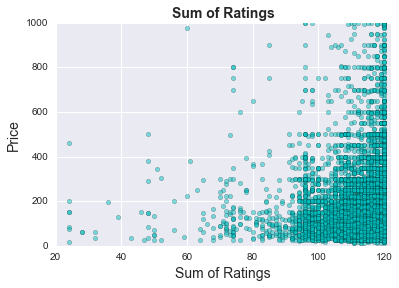

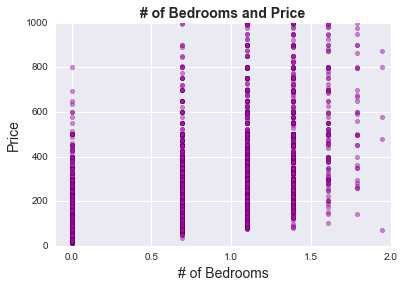

In [16]:
x = (df1['reviewtotal'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(20 ,122)

plt.xlabel('Sum of Ratings', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Sum of Ratings', fontsize=14, fontweight='bold')

x1 = np.log(df1['bedrooms'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'm', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.1 ,2)

plt.xlabel('# of Bedrooms', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms and Price', fontsize=14, fontweight='bold')

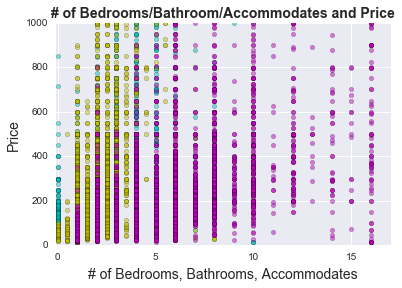

In [19]:
x1 = df1['bedrooms']
x2 = df1['bathrooms']
x3 = df1['accommodates']

y1 = df1['price']


fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'c', alpha = .5)
ax.scatter(x2, y1, c='y', alpha = .5)
ax.scatter(x3, y1, c='m', alpha = .5)
plt.ylim (-2,1000)
plt.xlim(-.1 ,17)

plt.xlabel('# of Bedrooms, Bathrooms, Accommodates', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms/Bathroom/Accommodates and Price', fontsize=14, fontweight='bold')

## c) The Model

### Now we transform the variables as necessary in the data and create the linear model to predict price given the features describes above.

In [58]:
#The merged features dataframe:
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'bedrooms', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [59]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train))
print 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test))

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train))

R-squared on Training Data: 0.545751114694
R=squared on Testing Data: 0.54732500001
Mean squared error on the test set:  8871.55847842
Mean squared error on the training set:  8616.10307294


## d) Fine-Tuning the Model: Predicting Price for Highly Popular LIstings

We may be able to achieve better prediction and r-squared if we segement the cities by a strong variable such as Availability. Putting similar variables together will result in more coorelation. 

#### Recall from the exploratory analysis above that the most popular cites are those that have the smallest percent average availability in the next year:

In [ ]:
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
DataFrame(x).sort(['mean'], ascending=[True])

#### Segment the Highly Popular (Less that 50% availability in the coming year) from the rest of the samples of cities. We might be able to predict price better for more popular cities.

**Highly Popular Cities:** San Francisco, NYC, Boston, Portland and San Diego




In [67]:
#DataFrame with Airbnb data on highly popular cities:
df_abnb = concat([sf, nyc, boston, portland, sandiego])

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'bedrooms', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [74]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train))
print 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test))

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train))

R-squared on Training Data: 0.631992647008
R=squared on Testing Data: 0.570393764932
Mean squared error on the test set:  5300.63658558
Mean squared error on the training set:  5292.74542935


In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

rf.fit(X_train, Y_train)

print "R-squared for training data: ", rf.score(X_train,Y_train) 

print "R-squared for test data: ", rf.score(X_test,Y_test) 

R-squared for training data:  0.935779596644
R-squared for test data:  0.586832605958
